<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/COMPLETE_4_Cross_validation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

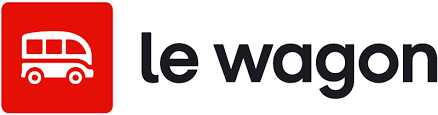

# Cross-validation

In this challenge, you will be introduced to a new concept: **cross-validation**.

Cross-validation is kind of similar to something you already know: **train-test split**.



Have a look at the diagram below. The upper part represents the **train-test split** which you already know. \
The lower part represents **cross-validation**.

![](https://wagon-public-datasets.s3.amazonaws.com/data-analytics/machine-learning/cross-validation.png)

As you can see, in the classic train-test split, we split the data in two sets: **train and test**.

In cross-validation, we further split the training set into *k* folds! In this case, *k* = 5. \
That means that 5 sub-models will be trained, and for each sub-model, 4 folds of data will be used for training and 1 fold will be used for testing. We will then compute the average test score of our sub-models, which is called a **cross-validated score**.


This is a very robust way to test the performance of our model, as we can make sure that each part of our data will be used at some point for testing.


## Import the data


We will be reusing the NBA dataset from the Regression challenge. 🏀


The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv)


Load it into a `df`variable.


In [4]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
df = pd.read_csv(url)

print(df.head())



   season  poss    mp  do_ratio    pacing  win_rating
0    1987  4847  2409 -1.546275 -0.599918    1.643091
1    2017  5582  2708  0.996587  0.531888   10.808427
2    2016  4976  2407  0.242598  0.127976    3.054773
3    2021  1178   585 -1.343806 -1.201034    0.230004
4    1988  4534  2056 -1.813990 -0.128997    0.905614


## Define X and y

Same as in the previous challenges, we need to define the features and the target.

Create **X** and **y**.



In [6]:
import pandas as pd

url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
df = pd.read_csv(url)

# Define Features (X)
X_columns = ["season", "poss", "mp", "do_ratio", "pacing"]
X = df[X_columns]

# Define Target (y)
y = df["win_rating"]



## Train-test split



You know the drill by now, use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets #
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3200, 5)
X_test shape: (800, 5)
y_train shape: (3200,)
y_test shape: (800,)


## Scaling the features

Just like in the previous challenges we need to scale our numerical features.

Import and instantiate a scaler of your choice from the **Sklearn** library. \
Then, scale your features and save the results in two new variables named `X_train_scaled`and `X_test_scaled`.

In [10]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler #
scaler = StandardScaler()

# Fit and transform the training data #
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler #
X_test_scaled = scaler.transform(X_test)


## Cross-validation

Now the fun begins! 🔥

Before cross-validating, we need to instantiate a model. \
Instantiate a **Linear Regression** model **without fitting it**.


In [11]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model #
linear_reg_model = LinearRegression()

# Print the model to see the default parameters #
print(linear_reg_model)


LinearRegression()


### 5-fold cross-validation


Time to cross-validate! \
You will need to import the `cross_val_score` method.

Run a **5-fold** cross-validation on your Linear Regression model. Store the results in a `score`variable.



<details>
    <summary>Help 😵‍💫</summary>
    
Here's the framework:

`score = cross_val_score(estimator=your_model, X=your_features, y= your_target, cv = number_of_folds)`

</details>


In [12]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation #
score = cross_val_score(estimator=linear_reg_model, X=X_train_scaled, y=y_train, cv=5)

# Print the cross-validation scores #
print("Cross-validation scores:", score)


Cross-validation scores: [0.68007992 0.64122789 0.65693981 0.62889269 0.58161533]


What does it look like? \
If you ran the code properly, `score`should contain 5 individual R<sup>2</sup> values!



---

What's the mean score? Store it in a `score_five`variable.


In [13]:
import numpy as np

# Calculate the mean score #
score_five = np.mean(score)

# Print the mean score #
print("Mean score from 5-fold cross-validation:", score_five)


Mean score from 5-fold cross-validation: 0.6377511292219615


### 10-fold cross-validation


Let's repeat the process, but this time with a **10-fold** cross-validation.

What does it imply in terms of sub-models ?



Performing a 10-fold cross-validation, plits the dataset into 10 subsets, and the model is trained and evaluated 10 times, each time using a different subset as the validation set. This process should provide a more robust estimate.

Run the cross-validation, and store the results in a `score` variable.


In [14]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation #
score_ten = cross_val_score(estimator=linear_reg_model, X=X_train_scaled, y=y_train, cv=10)

# Print the cross-validation scores #
print("Cross-validation scores:", score_ten)



Cross-validation scores: [0.66897565 0.69108226 0.64805502 0.63482546 0.64476102 0.67192783
 0.65481696 0.5951113  0.54996299 0.62233556]


`score`should now contain 10 individual R<sup>2</sup> values!


---

What's the mean score? Store it in a `score_ten`variable.

In [15]:
import numpy as np

# Calculate the mean score #
score_ten = np.mean(score_ten)

# Print the mean score #
print("Mean score from 10-fold cross-validation:", score_ten)


Mean score from 10-fold cross-validation: 0.6381854042315228


## Evaluate on the test set



**IMPORTANT NOTE**

Cross-validation **does not** fit the model! We will have to train our Linear Regression model before going any further.

Fit the model on your train set.



In [16]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model #
linear_reg_model = LinearRegression()

# Fit the model on the training data #
linear_reg_model.fit(X_train_scaled, y_train)

# Once the model is fitted, it's ready for evaluation and prediction #




LinearRegression()

Now score your fitted model on your test set.



In [19]:
# Score the model on the test data #
test_score = linear_reg_model.score(X_test_scaled, y_test)

# Print the test score #
print("Test score (R^2):", test_score)

# Print the scores #
print("Mean score from 5-fold cross-validation:", score_five)
print("Mean score from 10-fold cross-validation:", score_ten)
print("Test score (R^2):", test_score)



Test score (R^2): 0.6055086268473691
Mean score from 5-fold cross-validation: 0.6377511292219615
Mean score from 10-fold cross-validation: 0.6381854042315228
Test score (R^2): 0.6055086268473691


Compare the value to `score_five`and `score_ten`. The results should be in the same range!




## Conclusion

Cross-validation is a robust technique used to assess the performance of Machine Learning models. \
By partitioning the dataset into multiple sub-sets, or **folds**, and iteratively training and testing on these different combinations, cross-validation provides a more comprehensive understanding of a model's ability to generalize to new data.

Congratulations for your first day of Machine Learning! 🎉
